In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

cacao = pd.read_csv('cacao_flavors.xls')

In [50]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


Count the amount of numeric/non_numeric columns:

In [51]:
numeric_clmns = cacao.dtypes[cacao.dtypes != "object"].count() 
print(f"Total amount of numeric columns is {numeric_clmns}")
object_col = cacao.dtypes[cacao.dtypes == "object"].count()
print(f"Total amount of non-numeric columns is {object_col}")

Total amount of numeric columns is 4
Total amount of non-numeric columns is 6


Rename columns for convenience

In [52]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [53]:
cacao.rename(columns={'Bar id': 'bar_id', 'Company \n(Maker-if known)': 'company',
                      'Specific Bean Origin\nor Bar Name': 'specific_origin', 'REF': 'ref',
                      'Review\nDate': 'review_date', 'Cocoa\nPercent': 'cocoa_percent',
                     'Company\nLocation': 'company_location', 'Rating': 'rating',
                     'Bean\nType': 'bean_type', 'Broad Bean\nOrigin': 'broad_origin'}, inplace=True)

In [54]:
display(cacao.head(10))

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


Remove a useless column:

In [55]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

Make sure not to count empty lines as unique values:

In [56]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == "" else x)

In [57]:
pd.DataFrame(cacao.company.value_counts())

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Pangea,1
Tsara (Cinagra),1
Metropolitan,1
Chuao Chocolatier,1


In [58]:
display(cacao.head(10))

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,None,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


Company names mentioned in the dataset more than 10 times:

In [59]:
print("Company names with more than 10 entries:", (cacao.company.value_counts()>10).sum())

Company names with more than 10 entries: 30


Based on the information derived from the "company" column, there are 407 unique company names in the DataSet and 99 entries where company name is unknown. 

In [60]:
cacao.loc[:, ['company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


Check entries in the specific_origin column:

In [61]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"PNG, Nib Bar",1
Cooproagro,1
"Jutiapa, lot 050916D",1
"Satipo region, white label",1


Replace empty values with None in the specific_origin column. 

In [62]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == "" else x)

In [63]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Tumbes, Dear Mr. Finley, 2014",1
"PNG, Nib Bar",1
Cooproagro,1
"Jutiapa, lot 050916D",1


In [64]:
print("Areas of origin that have more than 10 entries:", (cacao.specific_origin.value_counts()>10).sum())

Areas of origin that have more than 10 entries: 15


As we can see ref data is distributed normally without outliers. There is also a noticeable trend showing that the amount of reviews kept increasing with time.

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

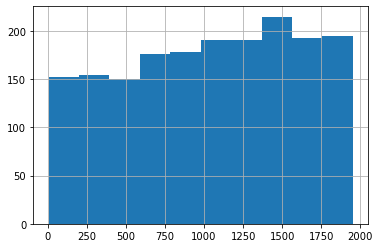

In [65]:
cacao.ref.hist()
cacao.ref.describe()

Review_date data is distributed normally.

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

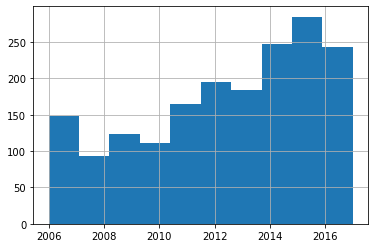

In [66]:
cacao.review_date.hist()
cacao.review_date.describe()

Remove "%" sign to simplify visualization and analysis

In [67]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))


count    1776.000000
mean       71.683277
std         6.335395
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: cocoa_percent, dtype: float64

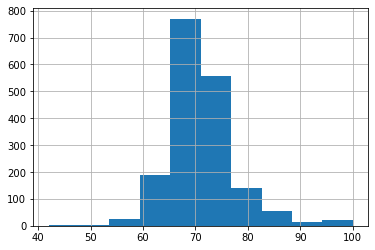

In [68]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

Use interquartile range formula to filter out outliers:

25th percentile: 70.0, 75th percentile: 75.0, IQR: 5.0,  Otliers are outside of the following range: [62.5, 82.5].


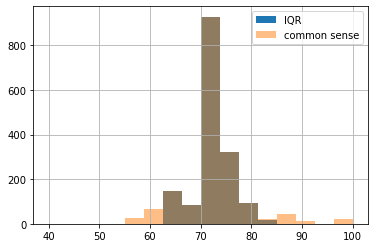

In [69]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 
print(
'25th percentile: {},'.format(perc25),
'75th percentile: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Otliers are outside of the following range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'common sense')
 
plt.legend();

IQR formula marks too many values as outliers, which indicates that there must have been an error in the collected data, thus we should use a common sense approach. 

In [70]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Company locations that have more than 10 entries:", (cacao.company_location.value_counts()>10).sum())
print("")
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Martinique,1
Czech Republic,1
India,1
Niacragua,1


Company locations that have more than 10 entries: 22

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


There are no empty values in the company_location column. There are 60 countries total and only 22 of them have more than 10 reviews.

Rating is the most important column as rating is what a machine learning model will try to predict.

Rating dispersion

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

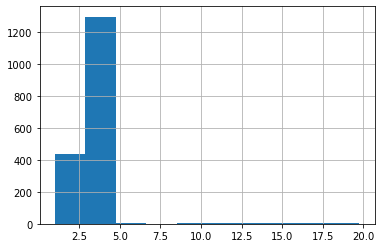

In [71]:
cacao.rating.hist()
cacao.rating.describe()

As we can see rating values are mostly distributed between 3.0 and 3.5, which leads to the following conclusions:
    - rating scale is most likely from 1 to 5
    - rating column contains outliers

25th percentile: 3.0, 75th percentile: 3.5, IQR: 0.5,  Outliers are outside of the following limits: [2.25, 4.25].


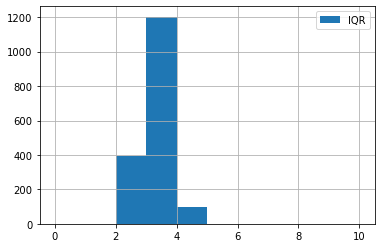

In [72]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25th percentile: {},'.format(perc25), '75th percentile: {},'.format(perc75), "IQR: {}, ".format(IQR), "Outliers are outside of the following limits: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Filter out the outliers:

In [73]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
cacao.rating

1       2.75
3       3.50
4       3.50
5       2.75
6       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: rating, Length: 1690, dtype: float64

Bean_type column

In [74]:
cacao.loc[:, ['bean_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


Convert empty values to None:

In [75]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

Make data in the bean_type column look uniformed:

In [76]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [77]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Unique values that have more than 10 entries:", (cacao.bean_type.value_counts()>10).sum())
print("Unique values:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
Beniano,3
EET,3


Unique values that have more than 10 entries: 5
Unique values: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [78]:
cacao.loc[:, ['broad_origin']].info()
display(cacao["broad_origin"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1690, dtype: object

In [79]:
# cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if x.strip() == "" else x)
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else 
                                              None if x.strip() == "" else x)

In [80]:
pd.DataFrame(cacao.broad_origin.value_counts())

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"South America, Africa",1
"Venezuela, Java",1
"Venezuela, Dom. Rep.",1
"Peru, Mad., Dom. Rep.",1


In [81]:
print("Unique values that have more than 10 entries:", (cacao.broad_origin.value_counts()>10).sum())
print("Unique values:", cacao.broad_origin.nunique())

Unique values that have more than 10 entries: 25
Unique values: 96


Some countries in the broad_origin column are misspelled, which impedes on the data analysis. The following function will help to uniform the data:

In [82]:
def fix_countries(x):

             if pd.isnull(x):

                            return x

             if x == 'nan':

                            return None

             if str(x).strip()=='':

                            return x

             x = x.replace(' ', '')

             x = x.replace('/', ',') # Venezuela/ Ghana

             x = x.replace('&', ',')

             if '(' in x:

                           x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)

             x = x.replace('Guat.', 'Guatemala')



             if 'Ven' in x and 'Venezuela' not in x:

                            x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex

                            x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador

                            x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.

                            if 'Ven' in x and 'Venezuela' not in x:

                                           x = x.replace('Ven', 'Venezuela')



             x = x.replace('Dom.Rep.', 'DomincanRepublic')

             x = x.replace('DR', 'DomincanRepublic')

             x = x.replace('Dom.Rep', 'DomincanRepublic')

             x = x.replace('D.R.', 'DomincanRepublic')

             x = x.replace('DominicanRep.', 'DomincanRepublic')

             x = x.replace('Domin.Rep', 'DomincanRepublic')

             x = x.replace('Domin.Re', 'DomincanRepublic')

             x = x.replace('DominicanRepublic', 'DomincanRepublic')



             if 'Jam' in x and 'Jamaica' not in x:

                            x = x.replace('Jam', 'Jamaica')



             if 'Mad.' in x and 'Madagascar' not in x:

                             x = x.replace('Mad.', 'Madagascar')

             elif 'Mad' in x and 'Madagascar' not in x:

                             x = x.replace('Mad', 'Madagascar')

             elif 'Ma' in x and 'Madagascar' not in x:

                             x = x.replace('Ma', 'Madagascar')



             if 'Hait' in x and 'Haiti' not in x:

                             x = x.replace('Hait', 'Haiti')

             

             if 'Per' in x and 'Peru' not in x:

                             x = x.replace('Per', 'Peru')



             x = x.replace('Nic.', 'Nicaragua')



             x = x.replace('Gre.', 'Grenada')



             x = x.replace('PNG', 'PapuaNewGuinea')



             if 'Mex' in x and 'Mexico' not in x:

                             x = x.replace('Mex', 'Mexico')



             x = x.replace('Haw.', 'Hawaii')



             x = x.replace('Ecuad.', 'Ecuador')

             x = x.replace('Ecu.', 'Ecuador')



             if ',' in x:

                           x = x[:x.find(',')]

             return x
 

In [83]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [84]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Unique values that have more than 10 entries:', (cacao.broad_origin.value_counts()>10).sum())
print("Unique values:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,213
Ecuador,181
Peru,166
DomincanRepublic,162
Madagascar,140
...,...
CostRica,1
Burma,1
Suriname,1
Tobago,1


Unique values that have more than 10 entries: 25
Unique values: 59
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


Determining what columns correlate with the rating column will help to choose the parameters that should be used for building a model. Correlation between rating column and other numeric columns can be visualized with help of seaborn and its pairplot function.

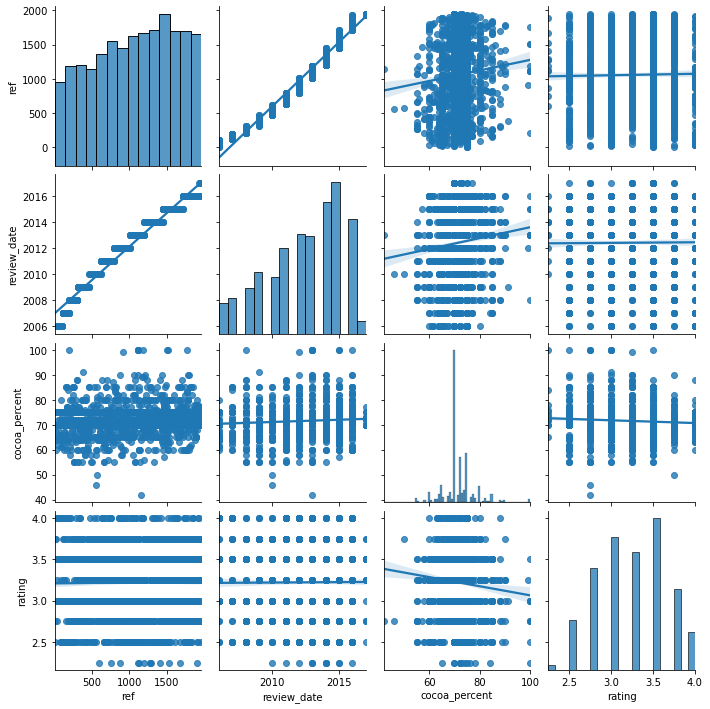

In [85]:
sns.pairplot(cacao, kind = 'reg')

Let's use correlation matrix to check correlation between the above mentioned columns:

In [86]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Since variables from review_date and ref columns show perfectly positive correlation, it makes sense to exclude one of the columns. In this case it is going to be the ref column. Now we have two columns that have weak positive correlation with the rating column: cocoa_percent and review_date. 
Positive correlation between review_date and rating may indicate that either chocolate bars get better with time, or that ratings get purposely inflated with time. 

# Nominal values analysis

Since regression analysis cannot be applied to nominal values using corr() method, we can use boxplot instead to show correlation between rating and nominal values columns. As there are too many unique values in the nominal columns we are going to use only the unique values that have more than 10 entries:

In [87]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

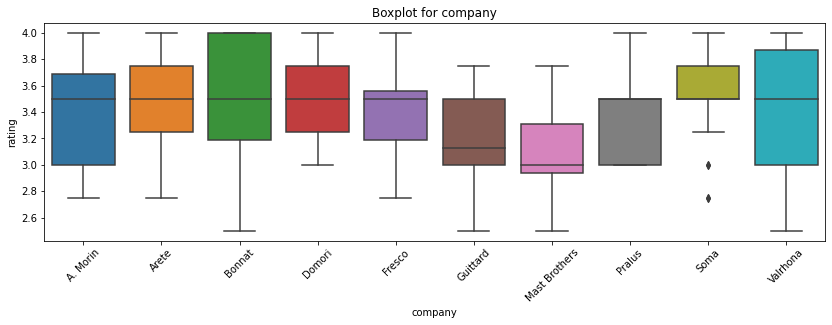

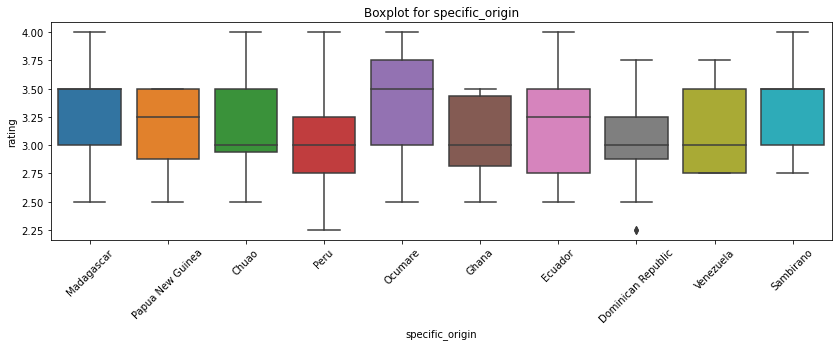

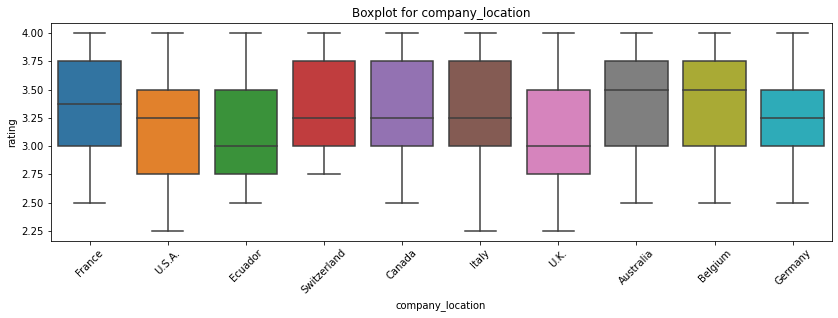

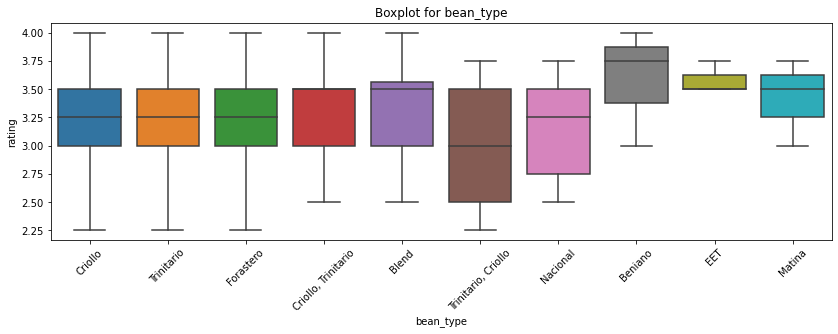

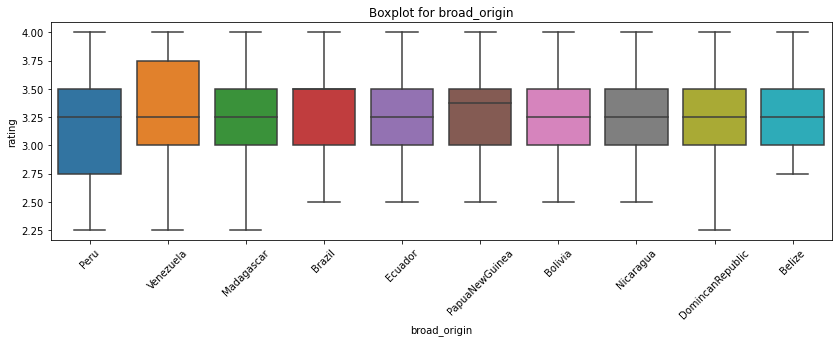

In [88]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

Let's use Student's test to determne if there is a statistical difference in rating distribution based on nominal values.
The data is checked against the N0 hypothesis that nominal values have no influence on rating. 

In [89]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Bonferroni correction
            print('Statistical difference is found for the following column:', column)
            break

In [90]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Statistical difference is found for the following column: company
Statistical difference is found for the following column: specific_origin
Statistical difference is found for the following column: company_location


As we can see there are three columns that show correlation with the rating column: company, specific_origin, company_location.
The list of parameters that can be used for building a model: company, specific_origin, company_location, review_date, cocoa_percent.

In [227]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


# CONCLUSION:

As a result of the EDA analysis of influence of various parameters on chocolate bar rating, the following was determined:
There is a relatively small amount of missing values in the dataset. The most amount of missing values was found in the bean_type column. Otliers were found only in the rating and cocoa_percent columns. All of that indicates that the data is pretty clean. 
Positive correlation between review_date and rating may indicate that either chocolate bars get better with time, or that ratings get purposely inflated.
The most distinctive parameters that can later be used for building a model are : company, specific_origin, company_location, review_date и cocoa_percent.
